In [1]:
import json

import cv2
import matplotlib.pyplot as plt

In [2]:
ANNOT_PATH = "data/01_ovary_cuts/roi_annotation_united/all_annotations.json"

with open(ANNOT_PATH, "r") as f:
    annotations = json.load(f)

In [3]:
slide = sorted(annotations.keys())[0]
roi = "roi2"
slide, roi

('0A_a', 'roi2')

In [4]:
img_full = cv2.imread(f"data/01_ovary_cuts/ovaries_images/{slide}/{slide}__{roi}.tif")

In [5]:
RESIZE_FACTOR = 1
img_tmp = cv2.resize(img_full, (0, 0), fx=RESIZE_FACTOR, fy=RESIZE_FACTOR)
img_tmp = cv2.cvtColor(img_tmp, cv2.COLOR_BGR2RGB)
img = img_tmp.copy()

In [6]:
class_colors = {
    "PMF": (255, 0, 0),
    "Primary": (0, 255, 0),
    "Secondary": (0, 0, 255),
}

In [7]:
for i in range(len(annotations[slide][roi]["bboxes"])):
    xmin, ymin, xmax, ymax = annotations[slide][roi]["bboxes"][i]
    xmin, xmax, ymin, ymax = int(xmin * RESIZE_FACTOR), int(xmax * RESIZE_FACTOR), int(ymin * RESIZE_FACTOR), int(ymax * RESIZE_FACTOR)
    classe_name = annotations[slide][roi]["classes"][i]
    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), class_colors[classe_name], 20)
    cv2.putText(img, classe_name, (xmin, ymin), cv2.FONT_HERSHEY_SIMPLEX, 6, class_colors[classe_name], 20)

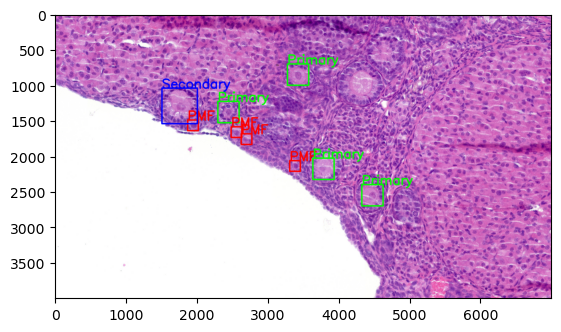

In [8]:
plt.imshow(img[16000:-2000, 5000:12000])


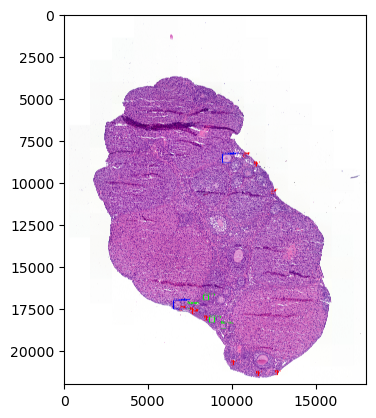

In [9]:
plt.imshow(img)
